In [1]:
# Download dataset
from torchvision.datasets import MNIST

In [2]:
np_train_dataset = MNIST('./mnist_train_np/', train=True, download=True)

In [3]:
# Start MLP implementation in numpy

In [4]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.preprocessing import OneHotEncoder

In [5]:
np.random.seed(3)

In [6]:
def fetch(fp):
    with open(fp, "rb") as f:
        data = f.read()
    return np.frombuffer(data, dtype=np.uint8).copy()

In [7]:
X_train = fetch("/Users/hafeezali/CS_760/HW4/mnist_train_np/MNIST/raw/train-images-idx3-ubyte")[0x10:].reshape((-1, 28 * 28))
Y_train = fetch("/Users/hafeezali/CS_760/HW4/mnist_train_np/MNIST/raw/train-labels-idx1-ubyte")[8:]
X_test = fetch("/Users/hafeezali/CS_760/HW4/mnist_train_np/MNIST/raw/t10k-images-idx3-ubyte")[0x10:].reshape((-1, 28 * 28))
Y_test = fetch("/Users/hafeezali/CS_760/HW4/mnist_train_np/MNIST/raw/t10k-labels-idx1-ubyte")[8:]

In [8]:
def normalize_data_and_convert_to_one_hot(X_train, Y_train, X_test, Y_test):
    
    # Encode output label as a one hot vector
    oneHotEncoder = OneHotEncoder(sparse=False, categories='auto')
    Y_train = oneHotEncoder.fit_transform(Y_train.reshape(len(Y_train), -1))
    Y_test = oneHotEncoder.transform(Y_test.reshape(len(Y_test), -1))
    
    # Normalize data by diving by 255. All values are in range 0-255
    X_train = X_train / 255.
    X_test = X_test / 255.

    return X_train, Y_train, X_test, Y_test

In [9]:
X_train, Y_train, X_test, Y_test = normalize_data_and_convert_to_one_hot(X_train, Y_train, X_test, Y_test)

In [10]:
# initialize params
n = 60000
batch_size = 64

In [11]:
# initialize weights
def initialize_weights():
    W1 = np.random.randn(300, 784) / np.sqrt(784)
    W2 = np.random.randn(10, 300) / np.sqrt(300)
    return W1, W2

In [12]:
costs = []
accuracies = []

In [13]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [14]:
def softmax(x):
    power = np.exp(x - np.max(x))
    return power / power.sum(axis=0, keepdims=True)

In [15]:
def de_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [16]:
def forward(X, W1, W2):
    Z1 = W1.dot(X.T)
    A1 = sigmoid(Z1)
    Z2 = W2.dot(A1)
    A2 = softmax(Z2)
    return A1, W1, Z1, A2, W2, Z2

In [17]:
def backward(X, Y, A1, W1, Z1, A2, W2, Z2):
    dZ2 = A2 - Y.T
    dW2 = dZ2.dot(A1.T) / n
    dZ1 = W2.T.dot(dZ2) * de_sigmoid(Z1)
    dW1 = dZ1.dot(X) / n
    return dW1, dW2

In [18]:
def predict(W1, W2, X, Y):
    A1, W1, Z1, A2, W2, Z2 = forward(X, W1, W2)
    y_hat = np.argmax(A2, axis=0)
    Y = np.argmax(Y, axis = 1)
    accuracy = (y_hat == Y).mean()
    return accuracy * 100

In [19]:
def train_model(X, Y, alpha=0.5, n_iterations=100000):
    W1, W2 = initialize_weights()
    for iteration in range(n_iterations):
        batch = np.random.choice(n, batch_size, replace=False)
        x = X[batch]
        y = Y[batch]
        A1, W1, Z1, A2, W2, Z2 = forward(x, W1, W2)
        cost = -np.mean(y*np.log(A2.T))
        dW1, dW2 = backward(x, y, A1, W1, Z1, A2, W2, Z2)
        W1 = W1 - alpha * dW1
        W2 = W2 - alpha * dW2
        acc = predict(W1, W2, x, y)
        if iteration % 100 == 0:
            print("Cost: ", cost, "Train Accuracy:", acc)
        if iteration % 10 == 0:
            costs.append(cost)
            accuracies.append(acc)
    return W1, W2

In [21]:
W1, W2 = train_model(X_train, Y_train)
print("W1: ", W1)
print("W2: ", W2)

Cost:  0.2424152752200896 Train Accuracy: 10.9375
Cost:  0.23456036958104157 Train Accuracy: 15.625
Cost:  0.23421344006110978 Train Accuracy: 7.8125
Cost:  0.2315487390245352 Train Accuracy: 10.9375
Cost:  0.23270089691545195 Train Accuracy: 14.0625
Cost:  0.23069072776232744 Train Accuracy: 9.375
Cost:  0.22837307590712452 Train Accuracy: 17.1875
Cost:  0.23004760607950522 Train Accuracy: 6.25
Cost:  0.22728310659456197 Train Accuracy: 10.9375
Cost:  0.2276891900573038 Train Accuracy: 15.625
Cost:  0.22631701027133877 Train Accuracy: 21.875
Cost:  0.2259052726414413 Train Accuracy: 26.5625
Cost:  0.22535309140704135 Train Accuracy: 25.0
Cost:  0.2257875965316388 Train Accuracy: 28.125
Cost:  0.2239841440050081 Train Accuracy: 26.5625
Cost:  0.2222392386070009 Train Accuracy: 31.25
Cost:  0.22408868214892372 Train Accuracy: 25.0
Cost:  0.22272611336397125 Train Accuracy: 31.25
Cost:  0.22262964619615433 Train Accuracy: 35.9375
Cost:  0.2206773101652956 Train Accuracy: 40.625
Cost:  0.

Cost:  0.1550001588730497 Train Accuracy: 76.5625
Cost:  0.15343957490872445 Train Accuracy: 73.4375
Cost:  0.15426122291970232 Train Accuracy: 71.875
Cost:  0.15851211813709462 Train Accuracy: 71.875
Cost:  0.1438575876892231 Train Accuracy: 78.125
Cost:  0.14677501093889195 Train Accuracy: 78.125
Cost:  0.14701712190069977 Train Accuracy: 79.6875
Cost:  0.14439600343681408 Train Accuracy: 78.125
Cost:  0.1469376469661145 Train Accuracy: 79.6875
Cost:  0.1432943320014393 Train Accuracy: 81.25
Cost:  0.15626370340244353 Train Accuracy: 82.8125
Cost:  0.13877192453086287 Train Accuracy: 87.5
Cost:  0.14757344137109685 Train Accuracy: 73.4375
Cost:  0.14731242027774516 Train Accuracy: 71.875
Cost:  0.15310432083615083 Train Accuracy: 71.875
Cost:  0.15139297770873011 Train Accuracy: 71.875
Cost:  0.14218983630651572 Train Accuracy: 78.125
Cost:  0.15908018179246505 Train Accuracy: 73.4375
Cost:  0.1504454587888732 Train Accuracy: 76.5625
Cost:  0.14165469041080878 Train Accuracy: 76.5625

Cost:  0.08886695549333126 Train Accuracy: 90.625
Cost:  0.08628944511781911 Train Accuracy: 90.625
Cost:  0.1031259651031948 Train Accuracy: 79.6875
Cost:  0.10200988945557476 Train Accuracy: 82.8125
Cost:  0.09160758014761755 Train Accuracy: 89.0625
Cost:  0.10076147016353387 Train Accuracy: 81.25
Cost:  0.10792991560534286 Train Accuracy: 78.125
Cost:  0.10333136723274491 Train Accuracy: 81.25
Cost:  0.09588441284020573 Train Accuracy: 84.375
Cost:  0.09601664081520621 Train Accuracy: 81.25
Cost:  0.09054431753862577 Train Accuracy: 84.375
Cost:  0.09530260746354657 Train Accuracy: 84.375
Cost:  0.0933931117533591 Train Accuracy: 76.5625
Cost:  0.10113873838549896 Train Accuracy: 76.5625
Cost:  0.08541514293191937 Train Accuracy: 85.9375
Cost:  0.10181752867229026 Train Accuracy: 78.125
Cost:  0.09576970564826354 Train Accuracy: 84.375
Cost:  0.09109743743022362 Train Accuracy: 85.9375
Cost:  0.09258797796448348 Train Accuracy: 79.6875
Cost:  0.09086524433271409 Train Accuracy: 87.5

Cost:  0.08412906963812769 Train Accuracy: 79.6875
Cost:  0.06591763215422967 Train Accuracy: 82.8125
Cost:  0.081328430819937 Train Accuracy: 82.8125
Cost:  0.07030428586041208 Train Accuracy: 87.5
Cost:  0.08170251901641373 Train Accuracy: 76.5625
Cost:  0.09180485113178698 Train Accuracy: 79.6875
Cost:  0.07332576744847821 Train Accuracy: 87.5
Cost:  0.06960165133172902 Train Accuracy: 87.5
Cost:  0.0910092329574641 Train Accuracy: 76.5625
Cost:  0.0734514976680384 Train Accuracy: 84.375
Cost:  0.06107129015598539 Train Accuracy: 85.9375
Cost:  0.0685972044434979 Train Accuracy: 84.375
Cost:  0.08407118659647195 Train Accuracy: 81.25
Cost:  0.09873472902795478 Train Accuracy: 73.4375
Cost:  0.068255326744196 Train Accuracy: 87.5
Cost:  0.07326246331644429 Train Accuracy: 81.25
Cost:  0.06949515213512343 Train Accuracy: 84.375
Cost:  0.08498307841895215 Train Accuracy: 78.125
Cost:  0.0707788264074016 Train Accuracy: 82.8125
Cost:  0.06600938345159718 Train Accuracy: 84.375
Cost:  0.

Cost:  0.06609687445719865 Train Accuracy: 85.9375
Cost:  0.061821971973862674 Train Accuracy: 85.9375
Cost:  0.057768059353430413 Train Accuracy: 84.375
Cost:  0.05819560389362527 Train Accuracy: 84.375
Cost:  0.06869664309728704 Train Accuracy: 81.25
Cost:  0.05357420985269523 Train Accuracy: 90.625
Cost:  0.05783749197243941 Train Accuracy: 89.0625
Cost:  0.05936965219976944 Train Accuracy: 87.5
Cost:  0.05618058187724637 Train Accuracy: 85.9375
Cost:  0.08016178612682874 Train Accuracy: 76.5625
Cost:  0.0545591882359467 Train Accuracy: 90.625
Cost:  0.06450152684015702 Train Accuracy: 81.25
Cost:  0.0688936222084291 Train Accuracy: 84.375
Cost:  0.057078282564774895 Train Accuracy: 82.8125
Cost:  0.0693154145985699 Train Accuracy: 81.25
Cost:  0.04566339099585402 Train Accuracy: 93.75
Cost:  0.04609821617676731 Train Accuracy: 93.75
Cost:  0.05854103646803412 Train Accuracy: 84.375
Cost:  0.08241859825486252 Train Accuracy: 81.25
Cost:  0.05449844522582843 Train Accuracy: 90.625
Co

Cost:  0.06772888844358381 Train Accuracy: 76.5625
Cost:  0.050713238747231736 Train Accuracy: 89.0625
Cost:  0.042366251347330054 Train Accuracy: 89.0625
Cost:  0.06129120146911342 Train Accuracy: 84.375
Cost:  0.060718802556769425 Train Accuracy: 85.9375
Cost:  0.05425297588534382 Train Accuracy: 87.5
Cost:  0.056845860479445176 Train Accuracy: 84.375
Cost:  0.04535007523136077 Train Accuracy: 85.9375
Cost:  0.06331400281406405 Train Accuracy: 84.375
Cost:  0.04666444025531297 Train Accuracy: 92.1875
Cost:  0.05216698343881323 Train Accuracy: 84.375
Cost:  0.0533598324816853 Train Accuracy: 87.5
Cost:  0.04844021692008464 Train Accuracy: 85.9375
Cost:  0.04549685675353924 Train Accuracy: 85.9375
Cost:  0.04545149765934976 Train Accuracy: 85.9375
Cost:  0.060920086333778975 Train Accuracy: 85.9375
Cost:  0.0538612186291935 Train Accuracy: 82.8125
Cost:  0.048723283118631944 Train Accuracy: 87.5
Cost:  0.07613839623860938 Train Accuracy: 82.8125
Cost:  0.03159283585651595 Train Accurac

Cost:  0.04692406922579618 Train Accuracy: 87.5
Cost:  0.05813000025354533 Train Accuracy: 85.9375
Cost:  0.05135402968830484 Train Accuracy: 84.375
Cost:  0.07572991827636522 Train Accuracy: 78.125
Cost:  0.06729335380492873 Train Accuracy: 76.5625
Cost:  0.05126857847633244 Train Accuracy: 89.0625
Cost:  0.04912071640592467 Train Accuracy: 90.625
Cost:  0.03562764189720542 Train Accuracy: 96.875
Cost:  0.040172502619865894 Train Accuracy: 92.1875
Cost:  0.054371078066140874 Train Accuracy: 89.0625
Cost:  0.047770675781326676 Train Accuracy: 90.625
Cost:  0.040403230418487604 Train Accuracy: 92.1875
Cost:  0.05748249565453982 Train Accuracy: 78.125
Cost:  0.04914662943480293 Train Accuracy: 87.5
W1:  [[ 0.06387959  0.01558964  0.00344634 ...  0.08277767  0.00929431
  -0.00038197]
 [-0.00828491 -0.00411447 -0.00972382 ... -0.0092874   0.02090517
   0.01205078]
 [ 0.04697977 -0.06075401  0.04262657 ... -0.01848008 -0.04617226
  -0.01070867]
 ...
 [-0.01228752  0.00400334  0.01453675 ...

In [22]:
predict(W1, W2, X_train, Y_train)

87.63

In [23]:
predict(W1, W2, X_test, Y_test)

88.29

In [ ]:
# batch_size = 64
# n_iterations = 100000
# learning rate = 0.5

In [49]:
test_error = 100 - predict(W1, W2, X_test, Y_test)
test_error

11.709999999999994

In [24]:
def plot_cost():
    plt.figure()
    plt.plot(np.arange(len(costs)), costs)
    plt.xlabel("epochs")
    plt.ylabel("cost")
    plt.show()

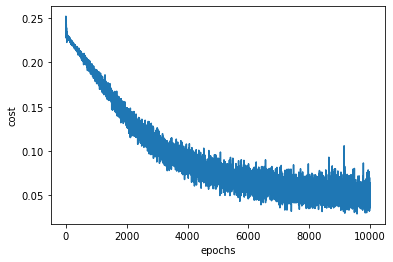

In [25]:
plot_cost()

In [26]:
def plot_accuracy():
    plt.figure()
    plt.plot(np.arange(len(accuracies)), accuracies)
    plt.xlabel("epochs")
    plt.ylabel("accuracy")
    plt.show()

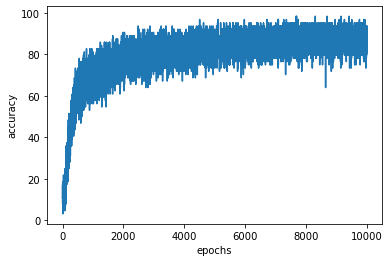

In [27]:
plot_accuracy()

In [28]:
n_costs = costs

In [30]:
len(n_costs)

10000

In [31]:
cost = 0
avg_costs = []
iterations = []
for i in range(len(n_costs)):
    cost+= n_costs[i]
    if (i+1) % 100 == 0:
        cost /= 100
        avg_costs.append(cost)
        iterations.append((i+1)*10)


In [33]:
len(avg_costs)

100

In [35]:
len(iterations)

100

In [36]:
def plot_avg_cost():
    plt.figure()
    plt.plot(iterations, avg_costs)
    plt.xlabel("iterations")
    plt.ylabel("cost")
    plt.show()

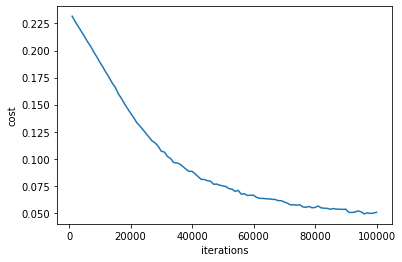

In [37]:
plot_avg_cost()

In [38]:
n_accuracies = accuracies

In [39]:
len(n_accuracies)

10000

In [40]:
accuracy = 0
avg_accs = []
iterations = []
for i in range(len(n_accuracies)):
    accuracy+= n_accuracies[i]
    if (i+1) % 100 == 0:
        accuracy /= 100
        avg_accs.append(accuracy)
        iterations.append((i+1)*10)

In [44]:
len(avg_accs)

100

In [43]:
len(iterations)

100

In [47]:
def plot_avg_accuracy():
    plt.figure()
    plt.plot(iterations, avg_accs)
    plt.xlabel("iterations")
    plt.ylabel("accuracy")
    plt.show()

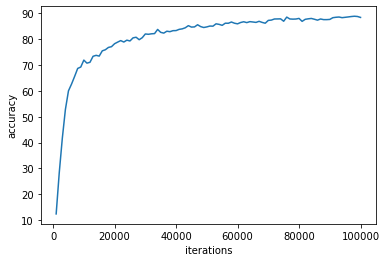

In [48]:
plot_avg_accuracy()